#  Reading and Writing Data in Text Format

## Table 6-1. Text and binary data loading functions in pandas

| Function        | Description                                                                 | Example (Python) |
|-----------------|-----------------------------------------------------------------------------|------------------|
| `read_csv`      | Load delimited data from a file, URL, or file-like object; comma is default delimiter | `pd.read_csv("data.csv")` |
| `read_fwf`      | Read data in fixed-width column format (no delimiters)                      | `pd.read_fwf("data.txt")` |
| `read_clipboard`| Variation of `read_csv` that reads data from the clipboard; useful for converting tables from web pages | `pd.read_clipboard()` |
| `read_excel`    | Read tabular data from an Excel XLS or XLSX file                            | `pd.read_excel("data.xlsx")` |
| `read_hdf`      | Read HDF5 files written by pandas                                           | `pd.read_hdf("data.h5")` |
| `read_html`     | Read all tables found in the given HTML document                            | `pd.read_html("page.html")` |
| `read_json`     | Read data from a JSON string, file, URL, or file-like object                | `pd.read_json("data.json")` |
| `read_feather`  | Read the Feather binary file format                                         | `pd.read_feather("data.feather")` |
| `read_orc`      | Read the Apache ORC binary file format                                      | `pd.read_orc("data.orc")` |
| `read_parquet`  | Read the Apache Parquet binary file format                                  | `pd.read_parquet("data.parquet")` |
| `read_pickle`   | Read an object stored by pandas using the Python pickle format              | `pd.read_pickle("data.pkl")` |
| `read_sas`      | Read a SAS dataset stored in SAS system’s custom storage formats            | `pd.read_sas("data.sas7bdat")` |
| `read_spss`     | Read a data file created by SPSS                                            | `pd.read_spss("data.sav")` |
| `read_sql`      | Read the results of a SQL query (using SQLAlchemy)                         | `pd.read_sql("SELECT * FROM table", con)` |
| `read_sql_table`| Read a whole SQL table (using SQLAlchemy); equivalent to selecting everything with `read_sql` | `pd.read_sql_table("table_name", con)` |
| `read_stata`    | Read a dataset from Stata file format                                       | `pd.read_stata("data.dta")` |
| `read_xml`      | Read a table of data from an XML file                                       | `pd.read_xml("data.xml")` |

In [62]:
!type "examples\\ex1.csv"

a,b,c,d,message
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo


In [63]:
import pandas as pd

In [64]:
df=pd.read_csv("examples\\ex1.csv")

In [65]:
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [66]:
!type "examples\\ex2.csv"

1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo


In [67]:
pd.read_csv("examples\\ex2.csv",header=None)

,0,1,2,3,4
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [68]:
pd.read_csv("examples\\ex2.csv",names=["a","b","c","d","message"])

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [69]:
names=["a","b","c","d","message"]


In [70]:
pd.read_csv("examples\\ex2.csv",names=names,index_col="message")

,a,b,c,d
message,,,,
hello,1,2,3,4
world,5,6,7,8
foo,9,10,11,12


In [71]:
!type "examples\\csv_mindex.csv"

key1,key2,value1,value2
one,a,1,2
one,b,3,4
one,c,5,6
one,d,7,8
two,a,9,10
two,b,11,12
two,c,13,14
two,d,15,16


In [72]:
parsed=pd.read_csv("examples\\csv_mindex.csv",index_col=["key1","key2"])

In [73]:
parsed

value1  value2
key1 key2                
one  a          1       2
     b          3       4
     c          5       6
     d          7       8
two  a          9      10
     b         11      12
     c         13      14
     d         15      16

In [74]:
!type "examples\\ex3.txt"

            A         B         C
aaa -0.264438 -1.026059 -0.619500
bbb  0.927272  0.302904 -0.032399
ccc -0.264273 -0.386314 -0.217601
ddd -0.871858 -0.348382  1.100491


In [75]:
result=pd.read_csv("examples\\ex3.txt",sep="\\s+")

In [76]:
result

,A,B,C
aaa,-0.264438,-1.026059,-0.619500
bbb,0.927272,0.302904,-0.032399
ccc,-0.264273,-0.386314,-0.217601
ddd,-0.871858,-0.348382,1.100491


In [77]:
!type "examples\\ex4.csv"

# hey!
a,b,c,d,message
# just wanted to make things more difficult for you
# who reads CSV files with computers, anyway?
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo


In [78]:
pd.read_csv("examples\\ex4.csv",skiprows=[0,2,3])

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [79]:
!type "examples\\ex5.csv"

something,a,b,c,d,message
one,1,2,3,4,NA
two,5,6,,8,world
three,9,10,11,12,foo


In [80]:
result=pd.read_csv("examples\\ex5.csv")

In [81]:
result

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [82]:
pd.isna(result)

,something,a,b,c,d,message
0,False,False,False,False,False,True
1,False,False,False,True,False,False
2,False,False,False,False,False,False


In [83]:
result=pd.read_csv("examples\\ex5.csv",na_values=["NULL"])

In [84]:
result

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [85]:
result2=pd.read_csv("examples\\ex5.csv",keep_default_na=False)

In [86]:
result2

,something,a,b,c,d,message
0,one,1,2,3,4,NA
1,two,5,6,,8,world
2,three,9,10,11,12,foo


In [87]:
result2.isna()

,something,a,b,c,d,message
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False


In [88]:
result3=pd.read_csv("examples\\ex5.csv",keep_default_na=False,na_values=["NA"])

In [89]:
result3

,something,a,b,c,d,message
0,one,1,2,3,4,NaN
1,two,5,6,,8,world
2,three,9,10,11,12,foo


In [90]:
result3.isna()

,something,a,b,c,d,message
0,False,False,False,False,False,True
1,False,False,False,False,False,False
2,False,False,False,False,False,False


In [91]:
sentinels={
    "message":["foo","NA"],
    "something":["two"]
}

In [92]:
pd.read_csv("examples\\ex5.csv",na_values=sentinels,keep_default_na=False)

,something,a,b,c,d,message
0,one,1,2,3,4,NaN
1,NaN,5,6,,8,world
2,three,9,10,11,12,NaN


## Arguments for `pandas.read_csv`

| Argument        | Description                                                                 |
|-----------------|-----------------------------------------------------------------------------|
| `path`          | String indicating filesystem location, URL, or file-like object.            |
| `sep` / `delimiter` | Character sequence or regex to split fields in each row. Default is comma (`,`). |
| `header`        | Row number to use as column names; defaults to `0` (first row). Use `None` if no header row. |
| `index_col`     | Column numbers or names to use as the row index; can be single or list (for MultiIndex). |
| `names`         | List of column names for result.                                            |
| `skiprows`      | Number of rows at beginning to ignore, or list of row numbers to skip.      |
| `na_values`     | Sequence of values to replace with NA. Added to default list unless `keep_default_na=False`. |
| `keep_default_na` | Whether to use the default NA value list (`True` by default).             |
| `comment`       | Character(s) to split comments off the end of lines.                        |
| `parse_dates`   | Attempt to parse data to datetime (`False` by default). Can be `True`, list of columns, or list of tuples for combined parsing. |
| `keep_date_col` | If joining columns to parse date, keep the joined columns (`False` by default). |
| `converters`    | Dict mapping column number or name to functions (e.g., `{"foo": f}`).       |
| `dayfirst`      | Treat ambiguous dates as international format (e.g., `7/6/2012 → June 7`). Default `False`. |
| `date_parser`   | Function to use to parse dates.                                             |
| `nrows`         | Number of rows to read from beginning (excluding header).                   |
| `iterator`      | Return a `TextFileReader` object for piecemeal reading.                     |
| `chunksize`     | For iteration, size of file chunks.                                         |
| `skip_footer`   | Number of lines to ignore at end of file.                                   |
| `verbose`       | Print parsing info (time spent, memory use).                                |
| `encoding`      | Text encoding (e.g., `"utf-8"`). Default is `"utf-8"`.                      |
| `squeeze`       | If parsed data has only one column, return a Series.                       |
| `thousands`     | Separator for thousands (e.g., `","` or `"."`). Default `None`.             |
| `decimal`       | Decimal separator in numbers (default `"."`).                              |
| `engine`        | CSV parsing engine: `"c"` (default), `"python"`, or `"pyarrow"`.            |

# Reading Text Files in Pieces

In [93]:
pd.options.display.max_rows=10

In [94]:
result=pd.read_csv("examples\\ex6.csv")

In [95]:
result

,one,two,three,four,key
0,0.467976,-0.038649,-0.295344,-1.824726,L
1,-0.358893,1.404453,0.704965,-0.200638,B
2,-0.501840,0.659254,-0.421691,-0.057688,G
3,0.204886,1.074134,1.388361,-0.982404,R
4,0.354628,-0.133116,0.283763,-0.837063,Q
...,...,...,...,...,...
9995,2.311896,-0.417070,-1.409599,-0.515821,L
9996,-0.479893,-0.650419,0.745152,-0.646038,E
9997,0.523331,0.787112,0.486066,1.093156,K
9998,-0.362559,0.598894,-1.843201,0.887292,G


In [96]:
pd.read_csv("examples\\ex6.csv",nrows=5)

,one,two,three,four,key
0,0.467976,-0.038649,-0.295344,-1.824726,L
1,-0.358893,1.404453,0.704965,-0.200638,B
2,-0.501840,0.659254,-0.421691,-0.057688,G
3,0.204886,1.074134,1.388361,-0.982404,R
4,0.354628,-0.133116,0.283763,-0.837063,Q


In [97]:
chunker=pd.read_csv("examples\\ex6.csv",chunksize=1000)

In [98]:
type(chunker)

pandas.io.parsers.readers.TextFileReader

In [99]:
chunker=pd.read_csv("examples\\ex6.csv",chunksize=1000)

In [100]:
tot=pd.Series([],dtype="int64")
for piece in chunker:
    tot=tot.add(piece["key"].value_counts(),fill_value=0)
    
tot=tot.sort_values(ascending=False)

In [101]:
tot[:10]

key
E    368.0
X    364.0
L    346.0
O    343.0
Q    340.0
M    338.0
J    337.0
F    335.0
K    334.0
H    330.0
dtype: float64

# Writing Data to Text Format

In [102]:
data=pd.read_csv("examples/ex5.csv")

In [103]:
data

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [104]:
data.to_csv("examples/out.csv")

In [105]:
!type "examples\out.csv"

,something,a,b,c,d,message
0,one,1,2,3.0,4,
1,two,5,6,,8,world
2,three,9,10,11.0,12,foo


In [106]:
import sys

In [107]:
data.to_csv(sys.stdout,sep="|")

|something|a|b|c|d|message
0|one|1|2|3.0|4|
1|two|5|6||8|world
2|three|9|10|11.0|12|foo


In [108]:
data.to_csv(sys.stdout,na_rep="NULL")

,something,a,b,c,d,message
0,one,1,2,3.0,4,NULL
1,two,5,6,NULL,8,world
2,three,9,10,11.0,12,foo


In [109]:
data.to_csv(sys.stdout,index=False,header=False)

one,1,2,3.0,4,
two,5,6,,8,world
three,9,10,11.0,12,foo


In [110]:
data.to_csv(sys.stdout,index=False,columns=["a","b","c"])

a,b,c
1,2,3.0
5,6,
9,10,11.0


In [111]:
temp=pd.read_csv("examples\\ex7.csv")
temp

,a,b,c
0,1,2,3
1,1,2,3


In [112]:
!type "examples\ex7.csv"

"a","b","c"
"1","2","3"
"1","2","3"


In [113]:
import csv

In [114]:
f=open("examples/ex7.csv")

In [115]:
reader=csv.reader(f)

In [116]:
for line in reader:
    print(line)

['a', 'b', 'c']
['1', '2', '3']
['1', '2', '3']


In [117]:
# f.close()

In [126]:
with open("examples/ex7.csv") as f:
    lines=list(csv.reader(f))

In [127]:
header,values=lines[0],lines[1:]

In [128]:
data_dict={h: v for h, v in zip(header,zip(*values))}

In [129]:
data_dict

{'a': ('1', '1'), 'b': ('2', '2'), 'c': ('3', '3')}

In [130]:
class my_dialect(csv.Dialect):
    lineterminator="\n"
    delimiter=";"
    quotechar='"'
    quoting=csv.QUOTE_MINIMAL
    
reader=csv.reader(f,dialect=my_dialect)

ValueError: I/O operation on closed file.

In [131]:
reader=csv.reader(f,dialect=my_dialect)

ValueError: I/O operation on closed file.

In [133]:
import numpy as np
data=pd.DataFrame(np.random.randn(5,5),
                  columns=list("abcde"),
                  index=["one","two","three","four","five"])

In [135]:
data

,a,b,c,d,e
one,0.665765,1.380698,2.934391,1.261720,0.746083
two,-0.889370,0.875274,1.755689,-1.036029,1.031876
three,-0.285403,-0.005945,-1.039368,-0.173340,0.567929
four,-1.758206,0.947548,2.135337,0.620446,0.165912
five,-0.367784,0.190095,0.291173,0.299019,-0.603269


In [136]:
import matplotlib.pyplot as plt

In [137]:
five_num_summary=data.describe().loc[["min","25%","50%","75%","max"]]


In [138]:
five_num_summary

,a,b,c,d,e
min,-1.758206,-0.005945,-1.039368,-1.036029,-0.603269
25%,-0.889370,0.190095,0.291173,-0.173340,0.165912
50%,-0.367784,0.875274,1.755689,0.299019,0.567929
75%,-0.285403,0.947548,2.135337,0.620446,0.746083
max,0.665765,1.380698,2.934391,1.261720,1.031876


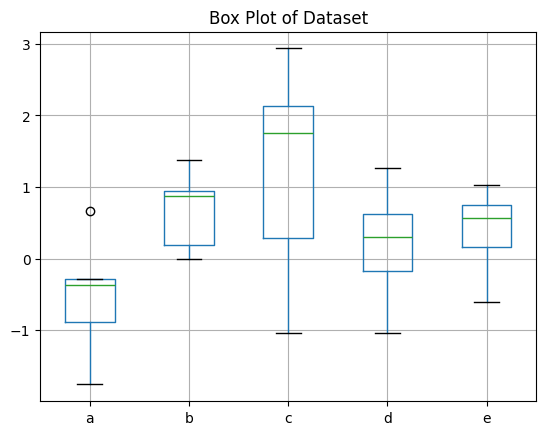

In [139]:
data.boxplot()
plt.title("Box Plot of Dataset")
plt.show()

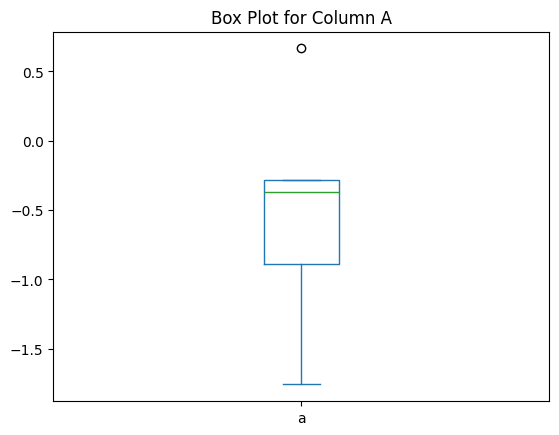

In [140]:
data["a"].plot(kind="box")
plt.title("Box Plot for Column A")
plt.show()